## 1. Imports

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras import datasets
from keras.utils import to_categorical
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf



2024-07-12 03:27:26.782296: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 03:27:26.782439: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 03:27:26.907406: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## 2. Load Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("{} train samples and {} test samples\n".format(len(x_train), len(x_test)))
print("train samples shape:", x_train.shape)
print("train labels shape:", y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
50000 train samples and 10000 test samples

train samples shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)


## 3. Map Class Number to Class Name

In [3]:
class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

## 4. Plot Samples Along with Their Class Names

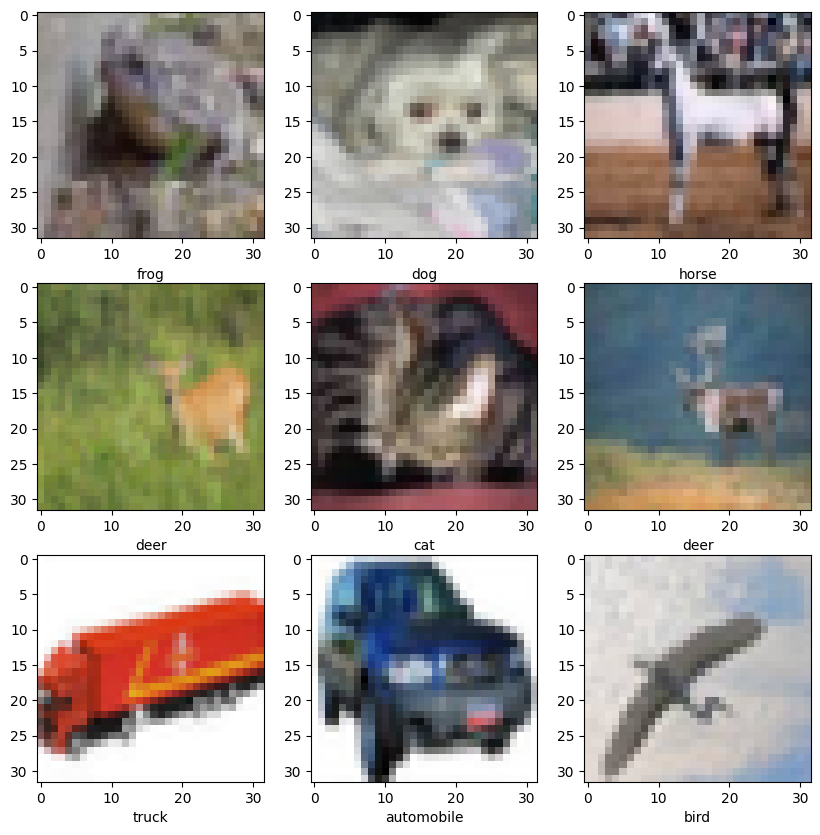

In [4]:
# select a random set of 9 images
idx = np.random.randint(len(x_train) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each sample
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_train[i + idx]) 
    plt.xlabel(class_names[(y_train[i + idx][0])])

# display results
plt.show()

## 5. Normalize Samples

In [5]:
# pixel values before normalization
print("before normalization:\n", x_train[0][0][0])

# normalize pixel values
x_train = x_train / 255.
x_test = x_test / 255.
# pixel values after normalization
print("after normalization:\n", x_train[0][0][0])

before normalization:
 [59 62 63]
after normalization:
 [0.23137255 0.24313725 0.24705882]


## 6. One Hot Encode Labels

In [6]:
# one hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## 7. Make Model Architecture

In [7]:
def build_model():
    model = models.Sequential()
    model.add(layers.Conv2D(128, 3, activation='relu', padding='same', input_shape=(32, 32, 3),
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(128, 3, activation='relu', padding='same',
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu',
                           kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dropout(0.5)) 
    
    model.add(layers.Dense(10, activation='softmax'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [8]:
# create model
model = build_model()
# see model details
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201,162 (4.58 MB)

 Trainable params: 1,201,162 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

## 8. Train Model

### 8.1 Perform Training

In [9]:
%%time
# train model
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

eval_set = (x_test, y_test)

history = model.fit(x_train, y_train,validation_data=eval_set, epochs=40,batch_size= 64,callbacks=[early_stopping])

Epoch 1/40
 33/782 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1216 - loss: 2.6708

I0000 00:00:1720754875.478968      69 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.2682 - loss: 2.2647 - val_accuracy: 0.4820 - val_loss: 1.6933
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4483 - loss: 1.7361 - val_accuracy: 0.5360 - val_loss: 1.5183
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4910 - loss: 1.6009 - val_accuracy: 0.5667 - val_loss: 1.4237
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5244 - loss: 1.5218 - val_accuracy: 0.5839 - val_loss: 1.3791
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5505 - loss: 1.4451 - val_accuracy: 0.6037 - val_loss: 1.3256
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5689 - loss: 1.3943 - val_accuracy: 0.6197 - val_loss: 1.2740
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5879 - loss: 1.3521 - val_accuracy: 0.6290 - val_loss: 1.2349
Epoch 8/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6016 - loss: 1.3087 - val_accuracy: 0.6390 - va

In [10]:
# save model to file
model.save('baseline.keras')

### 8.2 Plot Training Results

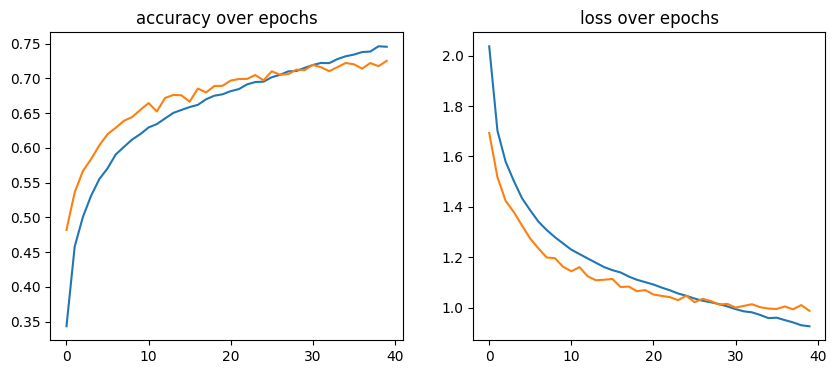

In [11]:
fig, axis = plt.subplots(1, 2, figsize=(10,4)) 
# plot accuracy
axis[0].plot(history.history["accuracy"])
axis[0].plot(history.history["val_accuracy"])


axis[0].set_title("accuracy over epochs")
# plot loss
axis[1].plot(history.history["loss"])
axis[1].plot(history.history["val_loss"])

axis[1].set_title("loss over epochs")
plt.show()

## 9. Test Model

### 9.1 Evaluation on Test Set

### 9.2 Fetch Predictions for Every Sample

In [12]:
predictions = model.predict(x_test)

print("\nprediction probabilities per class:\n", predictions[0])

print("\npredicted class:", np.argmax(predictions[0]))

print("actual class:", np.argmax(y_test[0]))

print("predicted class name:", class_names[np.argmax(predictions[0])])

print("actual class name:", class_names[np.argmax(y_test[0])])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

prediction probabilities per class:
 [1.2119662e-05 5.1074367e-05 3.7579775e-06 2.4973771e-01 2.9219195e-04
 7.1467455e-03 7.4018252e-01 7.0611924e-07 9.3172601e-04 1.6414876e-03]

predicted class: 6
actual class: 3
predicted class name: frog
actual class name: cat


### 9.3 Plot Predictions

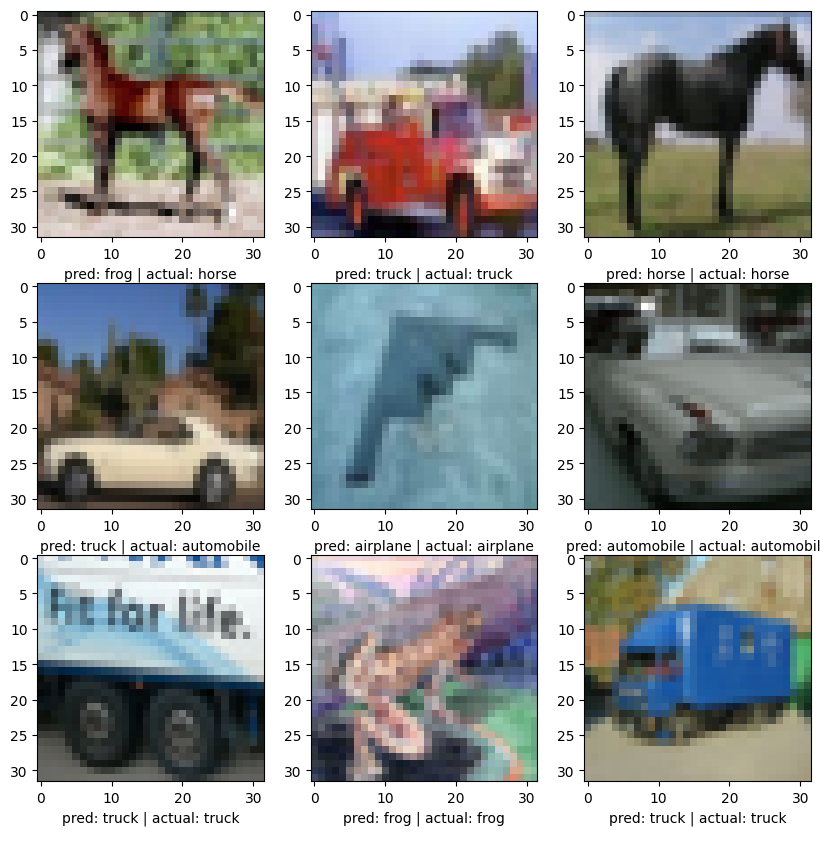

In [13]:
# select a random set of 9 test images
idx = np.random.randint(len(x_test) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each test image along with its prediction
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_test[i + idx]) 
    plt.xlabel("pred: {} | actual: {}\n".format(class_names[np.argmax(predictions[i + idx])], class_names[np.argmax(y_test[i + idx])]))

# display results
plt.show()